# LogisticRegression

### Import libraries and packages and read processed dataset as *.csv file

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
import pickle



RANDOM_SEED=256

data = pd.read_csv("./dataset/DatasetProcessed.csv")

churn = data.loc[:, data.columns == "Churn"].columns

### Splitting into train and test dataset and preprocessing with StandardScaler from sklearn library

In [3]:
train_cols = data.drop('Churn', axis='columns').columns
X = data[train_cols]
y = data[churn]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_SEED, stratify=y)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Applying LogisticRegression model from interpret.glassbox package

In [5]:
columns = X.columns.to_list()

In [15]:
from interpret.glassbox import LogisticRegression
lr = LogisticRegression(feature_names=columns, random_state=RANDOM_SEED)
lr.fit(X_train, y_train)


In [16]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

In [18]:
from interpret import show

lr_global = lr.explain_global()
show(lr_global)

`We assume that this model also predicted significance of features "tenure", "TotalCharges" and "InternetService_Fiber optic".`

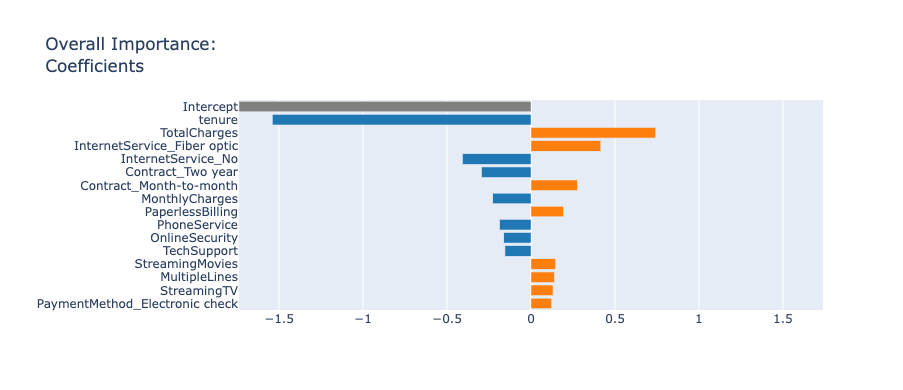

In [20]:
lr_local = lr.explain_local(X_test[:50], y_test[:50])
show(lr_local)

`This is a new customer with low total charges and model predicted that he left the company and it is true.`

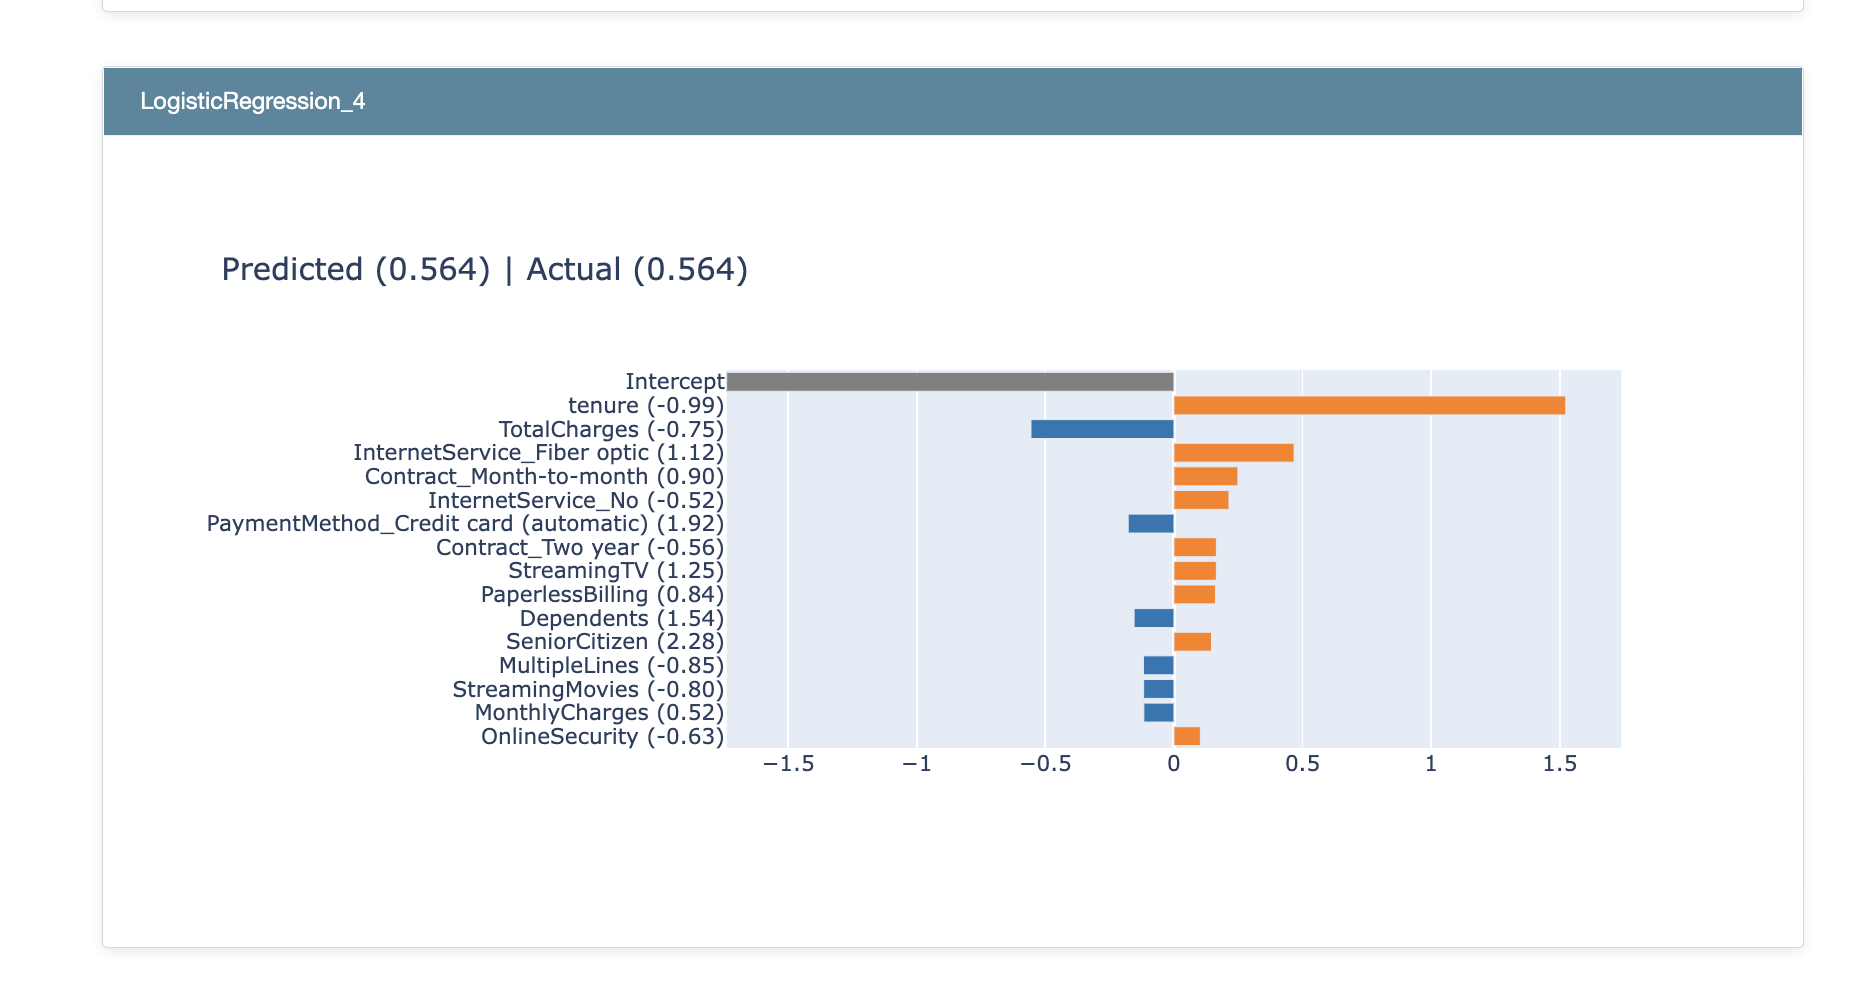

In [21]:
print("Train accuracy score : {}, Test accuracy score : {} ".format(lr.score(X_train,y_train), lr.score(X_test,y_test)))

Train accuracy score : 0.8097777777777778, Test accuracy score : 0.7953091684434968 


In [23]:
y_predicted = lr.predict(X_test)

`This model has better recall than both of models till now. This has recall 0.52 and the previous models have 0.49. The precision is lower then precisin previous models.`

In [25]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



### Confusion matrix

In [27]:
cf_matrix = confusion_matrix(y_test, y_predicted)

<AxesSubplot:>

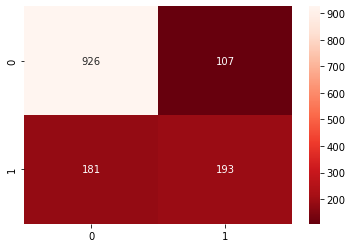

In [30]:
sns.heatmap(cf_matrix, annot=True, fmt='.22g', cmap='Reds_r')
